### Portfolio Returns for October 2023.

In [1]:
import pandas as pd
import os
import plotly.express as px
import portfolio

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
portfolio.net_liq_df

,net_liq,port_daily_returns,port_cumulative_returns,QQQ_cr,IWM_cr,DIA_cr,SPY_cr
date,,,,,,,
2023-10-20,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-21,1.005117e+08,0.005117,1.005117,NaN,NaN,NaN,NaN
2023-10-23,1.008146e+08,0.003013,1.008146,1.003018,0.991528,0.994354,0.998267
2023-10-24,1.007440e+08,-0.000700,1.007440,1.012775,1.000180,1.000755,1.005793
2023-10-25,1.008456e+08,0.001008,1.008456,0.987986,0.983658,0.997464,0.991358
2023-10-26,1.018890e+08,0.010346,1.018890,0.969148,0.986181,0.989825,0.979487
2023-10-27,1.024990e+08,0.005988,1.024990,0.973801,0.974585,0.978864,0.975047


<Axes: xlabel='date'>

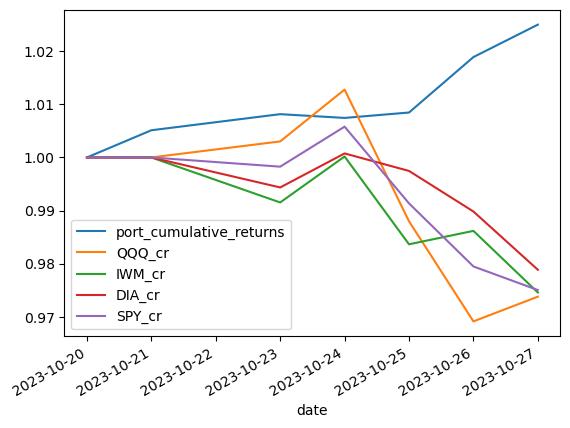

In [3]:
portfolio.net_liq_df[['port_cumulative_returns', 'QQQ_cr', 'IWM_cr', 'DIA_cr', 'SPY_cr']].fillna(1).plot()